# **ESERCIZI LEZIONE 6**

### ***1. DISTRIBUZIONE DI PROBABILITA'***

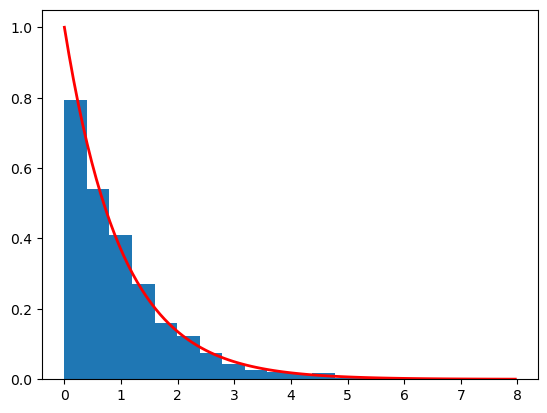

In [24]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp

parametro_forma = 1 

distribuzione = sp.stats.gamma(parametro_forma) 

valori_casuali = distribuzione.rvs(1000)

plt.hist(valori_casuali, bins=20, density=True)

x = np.linspace(0, max(valori_casuali), 100)

pdf_valori = distribuzione.pdf(x)

plt.plot(x, pdf_valori, 'r-', lw=2, label='PDF della Distribuzione Gamma')

plt.show()

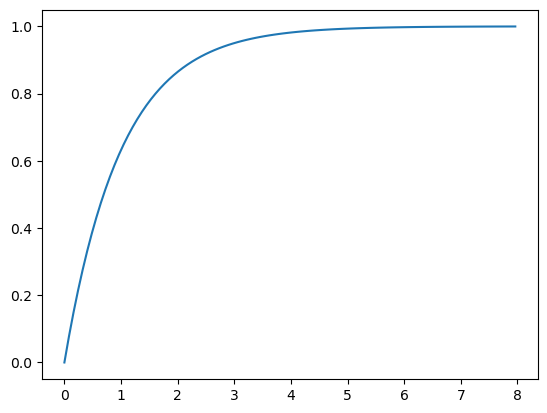

In [29]:
parametri_stimati = sp.stats.gamma.fit(valori_casuali)
parametro_forma_stimato = parametri_stimati[0]

plt.plot(x, distribuzione.cdf(x))
plt.show()

varianza = distribuzione.var()

### ***2. FITTA I DATI***

### ***3. MODELLO DI REGRESSIONE LINEARE DEI SEGUENTI DATI***